# Programming for Data Science and Artificial Intelligence

## Sklearn

So far
- bootcamp - Python
- NumPy
- Pandas

Today
- Sklearn - machine learning

- Matplotlib
- Deploying models to the internet - 6 hours

At this point, you can already work in many entry-level DS jobs

- Regression from scratch
- Classification from scratch
- Clustering from scratch + sklearn
- Dimensionaltiy reduction + sklearn

Midterm

Deep learning
- PyTorch (Numpy equivalent called torch tensors)
- Fully-Connected Neural Network
- Convolutional Neural Network

Signal Processing - useful for EEG, wifi, stocks, time series

Optional: AWS, GANs, Autoencoders, etc.

Chaky - why do i need to code?
--> some company just use software - Rapidminer, Weka, Azure ML, etc.
--> these software are very powerful, and can do many **typical** ML stuffs
--> but the highlight of coding, is that you can customize as much as you want, you can always use the latest algorithm, you don't have stick with the preprocessing techniques these software gave you....etc....Basically, coding is the MOST powerful.


Four jobs in the market:

Thailand: 35k - 200k

- Data analysts: Tools: PowerBI, Excel, SQL, Reports
- Data scientists: mathematics oriented; mostly Python
- Data engineers: database, cloud computing - AWS, Microsoft thingy
- ML ops:   software engineers in ML domain (very very efficient, and optimized - true computer science program)

In [78]:
# Pandas is built on top of NumPy
#   it means that Pandas, in a very raw level, is actually nothing but NumPy array
#   pandas has added functionality, like dealing with missing values, for example

# so why NumPy?  Why not use Pandas always?
# Pandas is MUCH slower than NumPy

### Import Pandas

In [79]:
import pandas as pd

In [80]:
pd.__version__

'1.4.3'

# 1. Extract-Transform-Load (ETL) 

- Challenge: many data sources; maintain a lot of connectors; transform them to one single format

### Load csv file

In [81]:
#the name of data that pandas called, is "Dataframe"
df = pd.read_csv("data/howlongwelive.csv")

### Preview the dataframe

In [82]:
#you use df.head()
#format: df.head(number of rows; default is 5; you can also put negative numbers)
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [83]:
#as I say, Pandas IS NumPy
df.shape

#means that there are 2938 rows, and 22 columns

(2938, 22)

In [84]:
#maybe you want a list of columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# 2. Exploratory Data Analysis (EDA)
- looking at the distribution of data
- plot something useful
- understand the data
- know which features to use
  
Note: **this is the MOST important step in all data science**

In [85]:
## related seaborn
#df.info()

#list the datatypes of the dataframe
#key: we DON'T LIKE "object" ==> "string"

#so when you "object", you change it to numbers or drop it

In [86]:
#two ways to access each column
#format1:  df['colname']
#format2:  df.colname
df['Status']  #try df.Status

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2938, dtype: object

In [87]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [88]:
developing_cond = df['Status'] == 'Developing'
developed_cond  = df['Status'] == 'Developed'

In [89]:
print("Number of developing countries: ", 
      len(df.Status[developing_cond]))

print ("Number of developed countries: ", 
       df.Status[developed_cond].count())

Number of developing countries:  2426
Number of developed countries:  512


In [90]:
df.Status[developed_cond].shape[0]

512

In [91]:
df['Alcohol'].max()  #try min(), mean(), median()

17.87

In [92]:
df.Alcohol.min(), df.Alcohol.mean(), df.Alcohol.median()

(0.01, 4.602860787172012, 3.755)

In [93]:
#exercise: get the rows with alcohol more than the median
#and count
#challenge: list these unique countries

#Answer:
#fancy_indexes = df.Alcohol > df.Alcohol.median()
#df.Country[fancy_indexes].unique()

In [94]:
#exercise2: get the list of country
#with Schooling more than the median
#and GDP more than the median

cond1 = df.Schooling > df.Schooling.median()
cond2 = df.GDP > df.GDP.median()

countries = df.Country[cond1 & cond2].unique()
#use | for or

type(countries)

numpy.ndarray

In [95]:
#for any columns of continuous value, 
# it gives you count, mean, std, min, etc.
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [96]:
#use some easy library for visualization
#it accepts input as dataframe
import seaborn as sns
#seaborn: super easy library for visualization
#it's built on top of matplotlib 
#matplotlib is the classic python library for visualization

#if i want to predict egg price, using gold and oil prices
#we called gold and oil prices MANY names
#   features, factors, independent variables, predictors, X
#   here, gold is called x_1, oil is called x_2
#we called egg price MANY names
#   labels, targets, outcomes, dependent variables, y

<AxesSubplot:xlabel='Status', ylabel='count'>

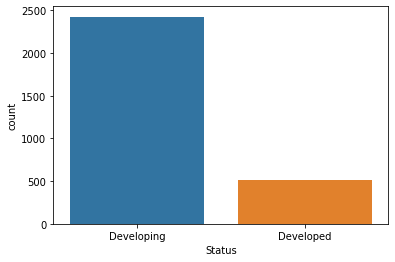

In [97]:
#1. countplot is to plot the discrete x_1 or y
sns.countplot(data = df, x="Status")

In [98]:
sns.__version__

'0.11.2'

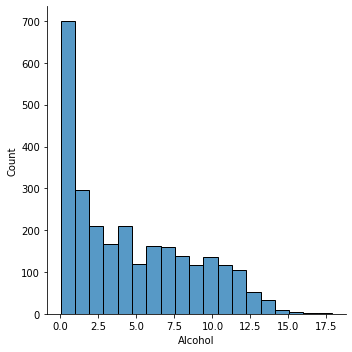

In [99]:
#2. distplot or displt is to plot the continuous x_1 or y
sns.displot(df.Alcohol)  #==> you get error, this is because your version is not >0.10
#displot = distribution plot

#exercise: try displot for another continuous variable

In [100]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [101]:
'''
format: .rename(
    columns =
    {oldname: newname,
     oldname2: newname2,
     oldname3: newname3}
)
'''
df = df.rename(
    columns = {'Life expectancy ': 'life-exp',
               'Income composition of resources' : 'income',
               'Schooling' : 'schooling'}
)

# df.head()

#tips:  if you don't want to do df=, just put a argument inplace=True
#exercise: can you change 
#   Income composition of resources to income, 
#   Schooling to schooling and 
#   Status to status

In [102]:
#challenge: help clear all the spaces in the columns
import numpy as np
df.columns = df.columns.str.strip()

df.columns

Index(['Country', 'Year', 'Status', 'life-exp', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income', 'schooling'],
      dtype='object')

<AxesSubplot:xlabel='Status', ylabel='life-exp'>

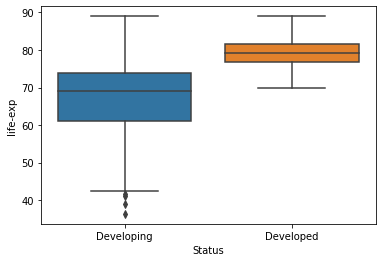

In [103]:
#3. boxplot is to plot discrete x_1 vs. continuous x_2/y
sns.boxplot(x = df['Status'], y = df['life-exp'])

<AxesSubplot:xlabel='Alcohol', ylabel='life-exp'>

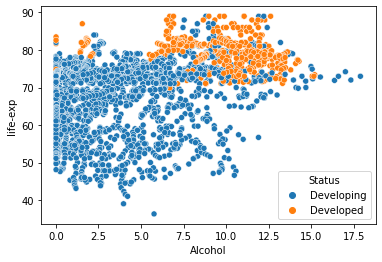

In [104]:
#4. scatterplot is to plot continuous x_1 vs. continuous x_2/y
#hue MUST be a discrete variable
sns.scatterplot(x = df['Alcohol'], y = df['life-exp'], hue = df['Status'])

In [105]:
df.columns

Index(['Country', 'Year', 'Status', 'life-exp', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income', 'schooling'],
      dtype='object')

In [106]:
cols = df.columns
cols = np.array(cols)

type(cols)

numpy.ndarray

In [107]:
#then i have to check how to remove
cols = np.delete(cols, np.where(cols=='Status'))
cols = np.delete(cols, np.where(cols=='Country'))
cols = np.delete(cols, np.where(cols=='life-exp'))
cols = np.delete(cols, np.where(cols=='Year'))

cols


array(['Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income', 'schooling'], dtype=object)

In [108]:
#exercise, find me the features that have very strong correlation with life-exp
#exercise, which features have almost NO relationship with life exp

#get some columns, but I also have to drop some columns - drop Status, drop Country, drop life-exp
# import matplotlib.pyplot as plt
# for each_col in cols: 
#     sns.scatterplot(x = df[each_col], y = df['life-exp'], hue = df['Status'])
#     plt.show()

<AxesSubplot:>

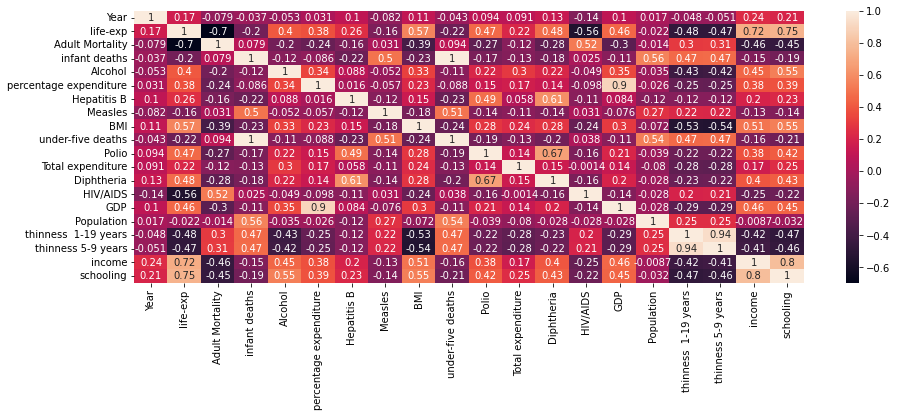

In [109]:
#exercise:  try sns.heatmap(df.corr(), annot=True)
#df.corr() calculates the correlation between continuous features

#exercise:  try to figure out how to increase the size of the figure 
# (hint: you have to change using matplotlib figure size)

#1st way: use sns.set 
#2nd way: set the figure size via the plt variable of matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True)

# 3. Preprocessing / Cleaning

### 3.1 dealing with missing values
  - Case 1: **Continuous values**
    - Replace with:
      - 1. **mean/median** if the distribution is normal
      - 2. **median** if the distribution is NOT normal
      - 3. **0** if 0 is a very common occurrence in the real-world
      - 4. **regression** if your data fits nicely with regression, especially linear regression
    - Do we ever drop?
      - Almost never.  Drop columns lose a lot of values, dropping rows also lost other features....
      - If you are super sure this is human mistake, you can drop
  - Case 2: **Discrete values**
    - Replace with: 
      - 1. **Majority** - when majority is like 90%
      - 2. **No category** - when we are not so sure
      - 3. **Ratio** - preserve the shape of distribution

In [110]:
#function to quickly check missing values
df.isna().sum()

# df['life-exp'].isna().sum()

#this is my plan:

#features: income, schooling, status
#label   : life-exp

Country                     0
Year                        0
Status                      0
life-exp                   10
Adult Mortality            10
infant deaths               0
Alcohol                   194
percentage expenditure      0
Hepatitis B               553
Measles                     0
BMI                        34
under-five deaths           0
Polio                      19
Total expenditure         226
Diphtheria                 19
HIV/AIDS                    0
GDP                       448
Population                652
thinness  1-19 years       34
thinness 5-9 years         34
income                    167
schooling                 163
dtype: int64

(0.6275510645976182, 0.677)

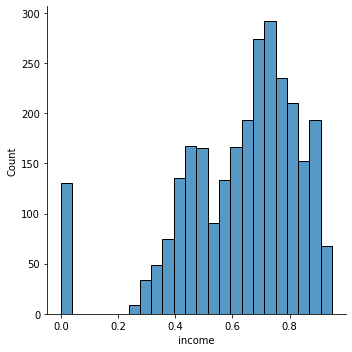

In [111]:
#typical steps to fill in missing value (continuous values)

#1. Ex1: plot the distribution (income, schooling, life-exp)
#if your data is discrete, use countplot
sns.displot(df['income'])

#2. Ex2: print mean and median
df['income'].mean(), df['income'].median()

#3. judge by yourself mean or median better, then fillna
##########I COMMENT DUE TO POSSIBLE DATA LEAKAGE
# df['income'] = df['income'].fillna(df['income'].median())
#df['income'].fillna(df['income'].median(), inplace=True)  ==> you don't have assign a variable to take the value

#exercise: please fillna for schooling and life-exp

#1. plot the distribution
# let's assume i plot already, and i found that median is a good representation
# good representation - high probability
# ##########I COMMENT DUE TO POSSIBLE DATA LEAKAGE
# df['life-exp'] = df['life-exp'].fillna(df['life-exp'].median())
# df['schooling'] = df['schooling'].fillna(df['schooling'].median())

#make sure schooling.isna().sum() and life-exp.isna().sum() is 0

#1, 2, 3, 3, 100

#assert df['schooling'].isna().sum() == 0  #unit test

#mean = 22
#median = 3

In [112]:
#press B to quickly get new cell
#press D D to quickly delete cell
#press M to change to markdown

In [113]:
# df.isna().sum()

In [114]:
# cols = ['life-exp', 'income', 'schooling']

# for col in cols:
#     df[col].fillna(df[col].median(), inplace=True)

# assert df['life-exp'].isna().sum() == 0
# assert df['income'].isna().sum() == 0
# assert df['schooling'].isna().sum() == 0

#one thing very important
#if YOU HAVE MISSING VALUES, when you run ML models
#   you will get error:  Infinity NaN values.....
#if you want to drop the rows, use df[colname].dropna()

### 3.2 Convert strings to numbers (float/int)

- because ALL ML and DL models don't take strings
  - data type error:  Expected int/float but got strings
- to quickly scan use info(), note the "objects"

In [115]:
#df.info() 
#scan for dtype = objects

In [116]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

#### Theory/principle how to convert string to integer/float

Three ways:

1. **Label encoding**: Just change to number:
   1. Example: change developing to 0, developed to 1
   2. Pros: super simple
   3. Cons: imagine you got encoded 0, 1, 2, 3, 4, 5
      1. You create a unwanted knowledge of order within this, e.g., 5 > 1
      2. NEVER USE label encoding if you have more than two categories
2. **One-hot encoding**: Pivot the values and make it become the columns
   1. Delete the column "Status"
   2. Put Developing as one column; Developed as another column
      1. if Developing is true, put 1, and then Developed will be 0
      2. if Developing is false, put 0, and then in the Developed col, will be 1
3. **Sparse one-hot encoding**: if you have n columns of pivot, you can always delete 1 to save space.

In [117]:
#we want to convert Status to 0 and 1
#easiest way is to use sklearn.preprocessing import LabelEncoder

#1. import the library
from sklearn.preprocessing import LabelEncoder

#2. create the object
le = LabelEncoder()

#3. fit and transform
some_make_up_data = np.array(["Male", "Female", "Female", "Male"]) #===one column of df
result = le.fit_transform(some_make_up_data)

print(result)

#if you want to know which map to which, use le.inverse_transform(np.array([0, 1]))

'''
le.fit_transform(some_make_up_data) 

=== 

le.fit(some_make_up_data)  #learn the mapping
result = le.transform(some_make_up_data)  #transform the data

'''

#i want to tell the difference between fit and transform
#fit means learn the pattern
#transform means transform the data

[1 0 0 1]


'\nle.fit_transform(some_make_up_data) \n\n=== \n\nle.fit(some_make_up_data)  #learn the mapping\nresult = le.transform(some_make_up_data)  #transform the data\n\n'

In [118]:
#Exercise: please tranform Status using LabelEncoder
df['status_en'] = le.fit_transform(df['Status'])
df['status_en'].unique()

array([1, 0])

In [119]:
#to know that what maps to what 
le.inverse_transform(np.array([0, 1]))

array(['Developed', 'Developing'], dtype=object)

In [120]:
#test that my transformation is correct
assert len(df['status_en'].unique()) == 2

Break: 16:50 - 17:00

### 3.3 Standardization / Normalization

-i.e., we usually do splitting before any preprocessing

- splitting - test train split before any preprocessing
  - if you standardize
  - if you fill missing value with some global statistics, you should split
  - (it's ok to label encode)

- when some knowledge of the testing set flows to the training set, we called "data leakage"  --> this is one of MOST COMMON MISTAKES of all beginners...like 99%


In [121]:
data = np.array([[1, 5], [2, 6], [3, 7], [4, 8]])

In [122]:
np.array([1, 2, 3, 4]).std()

1.118033988749895

In [123]:
(2 - 2.5) / 1.11

-0.4504504504504504

In [124]:
#for each feature, do (x - mean) / std

#for the first feature, mean = (1 + 2 + 3 + 4) / 4 = 2.5
# for the first data, do (1 - 2.5) / 1.11 = -1.35
# for the second data, do (2 - 2.5) / 1.11 = -0.45

#after standardization, all features will have same scale
#all features mean = 0, std = 1

#1. import the library
from sklearn.preprocessing import StandardScaler

#2. create the object
sc = StandardScaler()

#3. fit and transform
standardized_data = sc.fit_transform(data)

print(standardized_data)

#when do you want to standardize your data:
#1. when you use regression, definitely yes - feature importance
#2. in most classification algorithms (not distance-based algorithms), you benefit a bit
#   from standardization
#3. your training will be more stable

#when you should NOT standardize your data:
#1. when the mean does not represent well your data
#   signal
#   we can either do nothing or do min-max normalization
#from sklearn.preprocessing import MinMaxScaler #try this at your home
# (x - xmax) / (xmax - xmin) ==> (0, 1)

[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


# 4. Feature Extracton / Selection

- Seriously consider which X and y to use for training

In [125]:
df.columns

Index(['Country', 'Year', 'Status', 'life-exp', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income', 'schooling', 'status_en'],
      dtype='object')

#### Define X and y

In [126]:
X = df[['income', 'schooling', 'status_en']]
X.shape

#for X to be used with sklearn, it must be in the shape of (m, n)
#where m is number of samples, and n is number of features
#if you have only one feature, n = 1 (e.g., it cannot be (m, ); MUST be (m, 1))

assert X.shape[0] > 0
assert X.shape[1] > 0

In [127]:
y = df['life-exp']
#for y to be used with sklearn, if you only have one label,
#the shape is (m, ), where m is number of samples

#another possible is (m, k), k is the number of classes
#for sample 1, it belongs to class 2 out of four classes
#y will look like this [0, 1, 0, 0]
#predicted y will look like this [0.2, 0.3, 0.3, 0.2]
#for sample 2, it belongs to class 3 out of four classes
#y will look like this [0, 0, 1, 0]

#### Test-train-split

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

In [129]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2056, 3), (882, 3), (2056,), (882,))

In [130]:
import math
assert int(X.shape[0] * 0.7) == X_train.shape[0]
assert int(X.shape[0] * 0.7) == y_train.shape[0]
assert int(math.ceil(X.shape[0] * 0.3)) == X_test.shape[0]
assert int(math.ceil(X.shape[0] * 0.3)) == y_test.shape[0]

#### Fillna

- I assume you already deleted fillna on top!

In [131]:
#to avoid warning
X_train = X_train.copy()
X_test  = X_test.copy()

#fillna for training set
X_train['income'].fillna(X_train['income'].median(), inplace=True)
X_train['schooling'].fillna(X_train['schooling'].median(), inplace=True)
y_train.fillna(y_train.median(), inplace=True)

#use median of training set to fillna for testing set
X_test['income'].fillna(X_train['income'].median(), inplace=True)
X_test['schooling'].fillna(X_train['schooling'].median(), inplace=True)
y_test.fillna(y_train.median(), inplace=True)

In [132]:
assert X_train['income'].isna().sum() == 0
assert X_train['schooling'].isna().sum() == 0
assert y_train.isna().sum() == 0

assert X_test['income'].isna().sum() == 0
assert X_test['schooling'].isna().sum() == 0
assert y_test.isna().sum() == 0

#### Scaling

In [133]:
#now i want to show, let's say standardization, how to do

#please assume the same for any other preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [134]:
#please assume the same for fillna

#Exercise: 
# i want you to restart this notebook, but now, fillna with median() 
# from the training set....

In [135]:
# income_median    = np.median(X_train[: , 0])
# schooling_median = np.median(X_train[:,  1])

# income_median, schooling_median

#hint: get the median first, before it got standardized, 
# if not, the value you replaced is not valid

In [136]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2056, 3), (882, 3), (2056,), (882,))

In [137]:
X_train[:, 0].mean(), X_train[:, 1].mean()
X_train[:, 0].std(), X_train[:, 1].std()

(0.9999999999999999, 1.0)

# 4. Modeling

- prequisities - X: (m, n), y: (m, )

In [138]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#m = number of samples
#n = number of features

((2056, 3), (882, 3), (2056,), (882,))

In [139]:
X_train[1] #first sample of income, schooling, status_en

array([-0.59830618, -0.51245325,  0.45138351])

In [140]:
y_train[1] #label is life expectancy

59.9

Algorithms can be into supervised and unsupervised.

Supervised has input and label
Unsupervised has only input

Here, in our case, 
- input is income, schooling, and status_en (X)
- label is life expectancy (y)

Now in supervised learning, there are two types:
- if the label is continuous: Regression
- if the label is discrete:   Classification

Because life expectancy is a continuous value, we are doing a regression problem

For regression, 
- The most typical is Linear Regression

In [141]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle=True)

#here note that i have 5 samples!
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])

for ix, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"{ix}: {train_index} : {test_index}")

0: [0 1 2 3] : [4]
1: [0 1 3 4] : [2]
2: [0 1 2 4] : [3]
3: [1 2 3 4] : [0]
4: [0 2 3 4] : [1]


### 4.1 Cross validation

In [142]:
#modeling - to train a model to understand the pattern
#many possible algorithms to train a model
#sklearn DON'T USE GPU - although there is a way - they use CPU....

#1. import the algorithm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 

#data -> algorithm -> model

#Exercise: print out the r2 and RMSE for me
#put the RMSE and r2 for RandomForestRegressor in the chat....
#16:30 - 16:45

#2. create the object of the algorithm
rf = RandomForestRegressor(n_jobs=-1)  #n_jobs=-1 means i gonna use the full power of my PC
lr = LinearRegression()

#3. call .fit(X_train, y_train) to learn the patterns
# model.fit(X_train, y_train)

#import the cross validation function
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle=True)

#many ways for cv, go check at sklearn.model_selection, e.g., StratifiedFold
#run that function, finish!
#format: cross_val_score(model, xtrain, ytrain, cv=kfold(5), scoring='accuracy')

models = [lr, rf]
scores = []

for model in models:
    scores.append(
        cross_val_score(model, X_train, y_train, cv=kf, 
                         scoring='neg_mean_squared_error')
                  ) #try scoring='r2'

print(scores)
#Exercise: compare the cross-validation score between LinearRegression and 
#RandomForestRegressor (put on the chat the mean scores of the two...)

[array([-42.35989618, -39.23415305, -41.76639236, -36.47269065,
       -41.46062361]), array([-22.06535574, -25.87868691, -18.00586171, -25.79208681,
       -20.34019365])]


#### 4.2 Grid Search

We got that RandomForestRegressor is the best between LinearRegression and RandomForestRegressor.

Now, the question is, even RandomForestRegressor is the best between these two algorithms, can we find the **best version** of RandomForestRegressor?

Well, you can use cross-validation again!!!

Example:

rf1 = RandomForestRegressor(n_estimators=5, max_depth=5)
rf2 = RandomForestRegressor(n_estimators=6, max_depth=5)
rf3 = RandomForestRegressor(n_estimators=7, max_depth=5)

rf4 = RandomForestRegressor(n_estimators=5, max_depth=6)
rf5 = RandomForestRegressor(n_estimators=6, max_depth=6)
rf6 = RandomForestRegressor(n_estimators=7, max_depth=6)

....go on....

models = [rf1, rf2, ..., rf6]

for model in models:
    do cross_validation on model

DO YOU GUYS FEEL PAINFUL?

So the sklearn people help you create a nice function for you do loop all the parameters and is called `GridSearch`

GridSearch == Cross validation, but Gridsearch is for within one algorithm.

Normal steps:
- do `cross_val_score` to first compare different algorithms, --> best is RandomForestRegressor
- then do `gridsearch` to find the best version of that one best algoirthm  --> best is RandomForestRegressor(n_estimators = X, max_depth = Y, etc.)

In [143]:
#1. import the library
from sklearn.model_selection import GridSearchCV
#RandomSearchCV is a faster version

#2. define the search space
#is a dictionary: key(param): value(value)
#go to google and search sklearn RandomForestRegressor, see how many parameters
#what is the idea: no idea - just loop everything
param_grid = {
    'max_depth' : [5, 10],
    'n_estimators' : [5, 6, 7, 8, 9, 10],
    'max_features' : ['auto', 'log2'],
}
#how many combinations? --> 24 combinations

#3. define the model you want to search with
estimator = RandomForestRegressor(random_state=999)

#4. define the gridsearch object with the search space
grid = GridSearchCV(estimator  = estimator,
                    param_grid = param_grid,
                    cv = 5,  #by default, it uses kfold anyway; 5 here means 5 fold
                    n_jobs  = -1,
                    refit   = True, #refits means, after 24 loops, it will fit the best version again!, so grid = best model
                    scoring = 'neg_mean_squared_error',
                    return_train_score=True)

#5. run the search
grid.fit(X_train, y_train)  #why training set???


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=999), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [144]:
#after you run, you can check many things:

#best parameters
print(f"Best params: {grid.best_params_}")

#best mse (score)
print(f"Best mse: {grid.best_score_}")

#you can retrieve the best model (basically the model trained the best_params_)
print(f"Best estimator: {grid.best_estimator_}")  #but you DON'T NEED THIS, because the `grid` itself is already 
#the best model, because of refit=True

Best params: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 10}
Best mse: -21.14410166721787
Best estimator: RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=10,
                      random_state=999)


In [145]:
#Exercise: find the best combination of parameters, 
# and put on the chat....

In [146]:
#after you call fit, the model is created
#where is the model???
# lr.coef_

In [147]:
# lr.intercept_

In [148]:
#linear regression is this:
#y = 2.978*income + 3.548*schooling - 1.508*status_en + 69.2304

#if income = 1, schooling = 1, status_en = 1, what is life expectancy?
#y = 2.978 * 1 + 3.548 * 1 - 1.508 * 1 + 69.2304

2.978 * 1 + 3.548 * 1 - 1.508 * 1 + 69.2304

74.2484

In [149]:
data = np.array([  [1, 1, 1], [0.5, 0.1, 0.3]]) #income = 1, schooling = 1, status_en = 1

result = grid.predict(data)
result

array([77.33571429, 74.70426852])

In [150]:
# lr.coef_.shape

In [151]:
data.shape

(2, 3)

In [152]:
#dot product
# data @ lr.coef_ + lr.intercept_

# 5. Inference / Testing

- Well, now you got the model.  
- But what really matters, is how good it is
  - The measure of goodness:
    - testing the model with **unseen** data
    - the **unseen** data is basically our testing set

So you should NEVER use testing set to compare models or to find best parameters

Why?  Because you violate the "unseen data" law....

Then how to fix:

1. Easiest way: from the training set, further split it into training set and validation set
    - 100:  training set: 50; validation set: 20: testing set: 30
    - Train model on training set, test them first on validation set
    - Train another model on training set, test them first on validation set
    - Compare their validation score, and then adjust accordingly
    - Last, choose the best model you can, and test with testing set...

Bad things about this guy:
1. you lose data for validation

Answer: cross-validation

$\hat{y}$ = predicted y
<br>

$y$       = actual y

In [153]:
#4. call .predict(X_test) to ask the model to predict the label given the features

#now the best model is `grid` because of refit=True
#Exercise: now, please run everything, and put the best r2 on the chat
yhat = grid.predict(X_test)
#yhat

### 5.1 Evaluation

- For regression, the common metric is two
  - Root squared mean error (RMSE)
  - $r^2$

In [154]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MSE  = mean_squared_error(y_test, yhat)
RMSE = math.sqrt(MSE)
MAE  = mean_absolute_error(y_test, yhat)

MSE, RMSE, MAE

#if you compare two models
#a slight difference in RMSE may equal to big difference in MSE

(20.136228497221563, 4.487340916090682, 3.1403587571899894)

In [155]:
#lower the error, better
#d1 + d2 + d3 + ... + dn
#if you only do like this, they will cancel - positive will cancel negatives

#how to fix this: two ways
#d1^2 + d2^2 + d3^2 + ... + dn^2   ===> mean_squared_error
#sqrt (d1^2 + d2^2 + d3^2 + ... + dn^2)  ===> root_mean_squared_error

#|d1| + |d2| + |d3| + ... + |dn|  ===> mean_absolute_error

#which one to use? Just use all three? if one go up, another will go up


In [156]:
#how do i know (38.01317129153252, 6.1654822432257905, 4.533491536620471) is low or high
#lower better

#what is the range of RMSE, MSE, MAE
#(0, infinity)

#how to interpret
#2 ways: 1) compare with your friend....academic paper
#        2) R^2 - this is NOT an alternative for RMSE, but a complement

#R^2 is basically benchmarking your model against **the mean line**

#R^2  = 1 - RSS / TSS  (RSS = MSE of the model, TSS is basically the MSE of mean line)
# = 1 => you are so much better than mean
# = 0 ==> no better than mean
# < 0 ==> worse than mean

#range: (-infinity , 1)

Example how $r^2$ works

In [157]:
real_y = np.array([1, 2, 3, 4, 5, 6, 7])

good_yhat = np.array([1, 2, 3, 4, 5, 6, 7])
mean_yhat = np.array([4, 4, 4, 4, 4, 4, 4])
verybad_yhat = np.array([999, 999, 11000, 3333, 4444, 3333, 5555])

from sklearn.metrics import r2_score

#Exercise: help me calculate the r2 score of real_y vs good, real_y vs. mean, 
# real_y vs. very bad

print("Good: ", r2_score(real_y, good_yhat))
print("No better than the mean: ", r2_score(real_y, mean_yhat))
print("Worse than mean: ", r2_score(real_y, verybad_yhat))

Good:  1.0
No better than the mean:  0.0
Worse than mean:  -6984292.464285715


In [158]:
#Exercise: calculate the r2 score of y_test and our yhat
#try to interpret
r2_score(y_test, yhat)

0.7797482531711045

# 6. Feature Importance

- Refers to which features is important
  - income, schooling, status_en ->which features are really important for prediction?

- Three families of feature importance
  1. **Algorithm** way - the algorithm provides a mean to understand feature importance
     1. Linear regression - you can look at the weights (if you standardized your data)
     2. RandomForest - you can go to `grid.feature_importances` which will tell you which feature is more important
  2. **Permutation** way - randomly shuffle your feature, and monitor how your performance changes. Uses `from sklearn.inspection import permutation_importance`
  3. **Shap** way - uses game theory to know which features are good. You have to `pip install shap`, and then `import shap`

### 6.1 Algorithm way

In [164]:
#grid.best_estimator_ will give you the random forest
#and random forest algorithm provide an attribute called feature_importances
#different algorithms in sklearn may or MAY NOT give you feature importance
grid.best_estimator_.feature_importances_

array([0.59206049, 0.29457715, 0.11336236])

<BarContainer object of 3 artists>

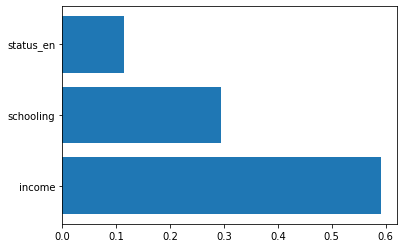

In [170]:
plt.barh(['income', 'schooling', 'status_en'], 
         grid.best_estimator_.feature_importances_)

### 6.2 Permutation way

In [172]:
#1. import the library
from sklearn.inspection import permutation_importance

#2. just run the function
#format: permutation_importance(model, X_test, y_test)
importance = permutation_importance(grid, X_test, y_test)
print(importance)

#take 2-3 mins to understand this...

{'importances_mean': array([71.77849704, 28.09158671,  9.10955226]), 'importances_std': array([3.86462904, 1.98685333, 1.3558588 ]), 'importances': array([[70.54726265, 71.89027451, 77.40616799, 73.48138879, 65.56739126],
       [27.34855852, 31.22141839, 29.05140035, 27.61594842, 25.22060786],
       [11.22256621,  8.15338466,  8.2325967 , 10.19526192,  7.74395183]])}


<BarContainer object of 3 artists>

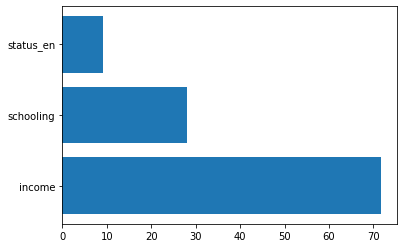

In [174]:
#3. optional: you can plot
#exercise: plot the importances_mean with ['income', 'schooling', 'status_en']
plt.barh(['income', 'schooling', 'status_en'], importance['importances_mean'])

### 6.3 Shap way

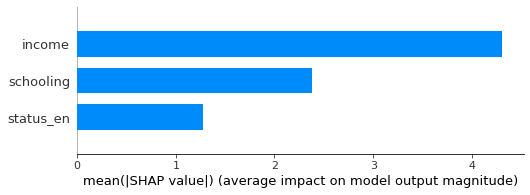

In [178]:
#1. import the library
import shap

#2. create the shap explainer
explainer = shap.TreeExplainer(grid.best_estimator_)

#3. run the shap! 
shap_values = explainer.shap_values(X_test)
#print(shap_values)

#4. plot!
#format: shap.summary_plot(shap_values, X_test, plot_type, features_names)
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names = ['income', 
                                                                          'schooling',
                                                                          'status_en'])

# 7. Saving model for deployment

In [179]:
#import pickle
import pickle

#set the filename
filename = 'models/lifeexmp.pkl' #.pkl is optional but useful for reminder

#dump the file 
#format: pickle.dump(model, open(filename, 'wb')) #wb stands writing
pickle.dump(grid, open(filename, 'wb'))

#i can show you how to load the model
loaded_model = pickle.load(open(filename, 'rb'))

#i can show you how you can instantly use the model to predict
some_data = np.array([   [1, 2, 3], [4, 5, 6]  ])
#Exercise:  can you help me predict the life expectancy
#when income = 0.6, schooling = 0.5, status_en = 0.9
#your model expects standardized values, so make sure you standardize first
print(loaded_model.predict(sc.transform(some_data)))

[73.96742857 74.61742857]
